(32, 32, 3) b'cat'


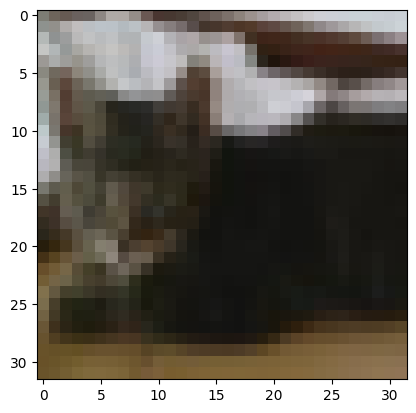

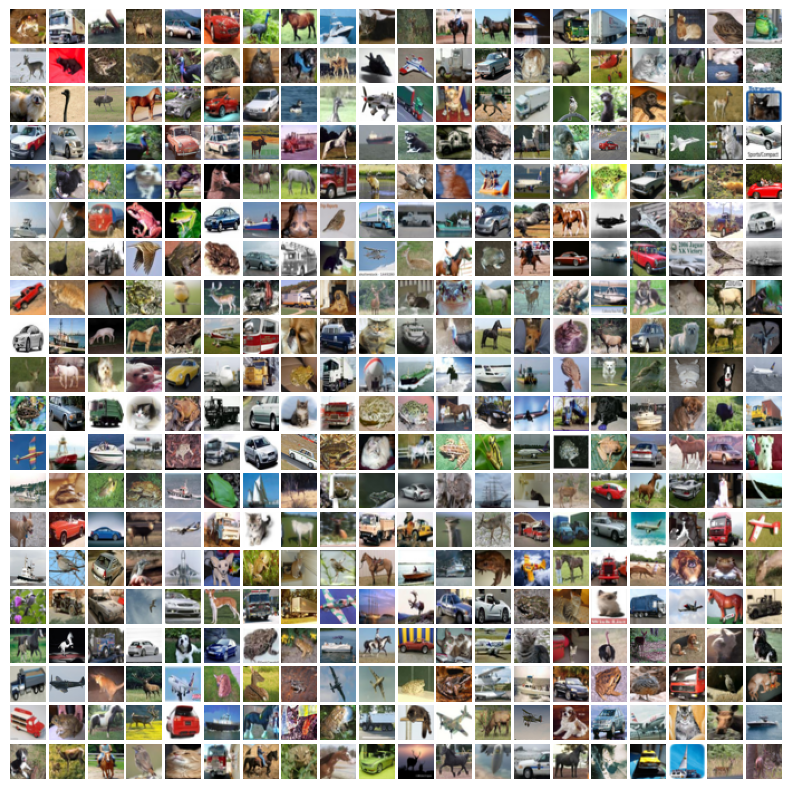

In [140]:
import pickle
import numpy as np
from matplotlib import pyplot as plt

# ubah dari 1 dimensi menjadi format RGB agar bisa ditampilkan dengan matplotlib
def imread(images, N):
    # shape: 3072 * 1
    x = images[b'data'][N]
    # shape: 32 * 32 * 3
    x = x.reshape(3, 32, 32).transpose(1, 2, 0)
    return x


def unpickle(file):
    with open(file, 'rb') as f:
        dict = pickle.load(f, encoding='bytes')
    return dict


METADATA_PATH = './data/cifar-10-batches-py/batches.meta'
metadata = unpickle(METADATA_PATH)
# print(metadata)

images = unpickle('./data/cifar-10-batches-py/data_batch_1')
# print(images.keys())

############################################

N = 9

x = imread(images, N)
label = metadata[b'label_names'][images[b'labels'][N]]

print(x.shape, label)

plt.ti
plt.imshow(x)

############################################

ROWS = 20
COLUMNS = 20

# setting ukuran plot keseluruhan. ukuran gambar menyesuaikan ukuran plot
fig = plt.figure(figsize=(10, 10))

# atur jarak antar gambar
fig.subplots_adjust(wspace=0, hspace=0.1)

# render
for i in range(ROWS * COLUMNS):
    x = imread(images, i)
    fig.add_subplot(ROWS, COLUMNS, i+1)
    plt.axis('off')
    plt.imshow(x)

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

Files already downloaded and verified
Files already downloaded and verified
('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
truck
4


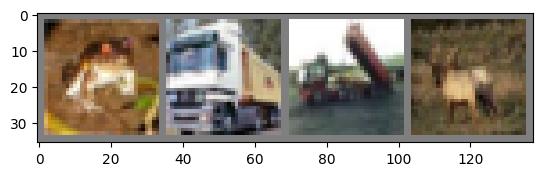

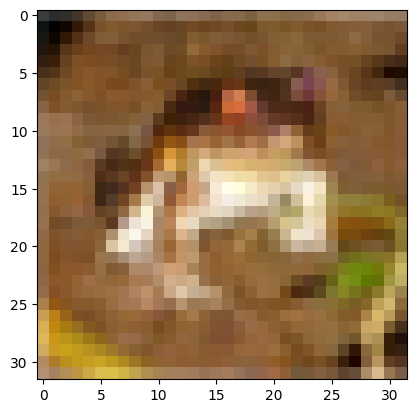

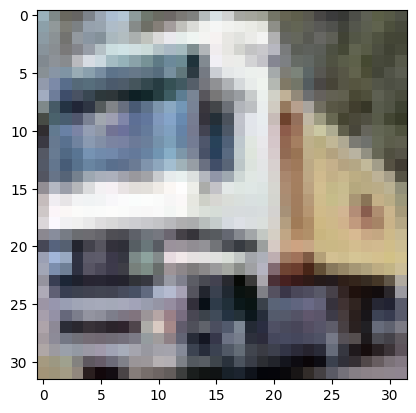

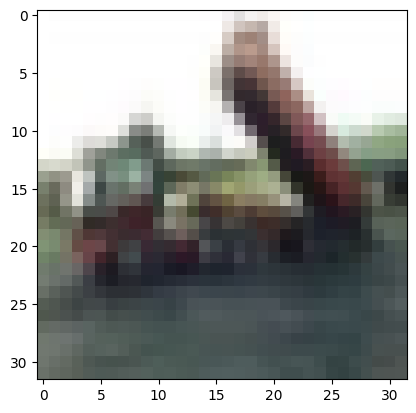

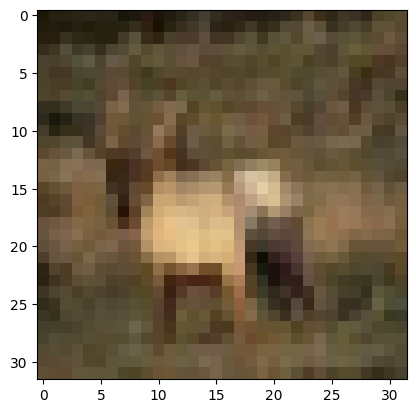

IndexError: index 4 is out of bounds for dimension 0 with size 4

In [51]:
import cv2
from PIL import Image
import torch
import torchvision
import torchvision.transforms as transforms
from matplotlib import pyplot as plt
import numpy as np

BATCH_SIZE = 4

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()

    # plt.figure(figsize=(1, 1))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# membuat fungsi transform. mengubah PIL menjadi tensor
# Normalize menerima input: mean, standard deviations, inplace. di sini hanya mean dan std saja
transform = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Resize(64), # dimensi berubah
    # transforms.Normalize((0.2, 0.2, 0.2), (0.2, 0.2, 0.2))
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    # transforms.Normalize((1.0, 1.0, 1.0), (1.0, 1.0, 1.0))
])

# list of PIL format
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# DataLoader mengubah list of PIL format menjadi list of tensor
# selain itu, DataLoader memiliki fungsi-fungsi khusus lainnya
trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=BATCH_SIZE,
                                          shuffle=False,
                                          num_workers=2)
testloader = torch.utils.data.DataLoader(testset,
                                         batch_size=BATCH_SIZE,
                                         shuffle=False,
                                         num_workers=2)

# class names sudah ada di dalam datasets
# classes = trainset.class_to_idx
classes = (
    'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'
)
print(classes)

# tampilkan dimensi dan label gambar
first = trainset[0][0]
# print(f"height: {first.height}, width: {first.width}, channel: {len(first.mode)}")
print(classes[trainset[1][1]])

# i = 0
# while i < 5:
#     imshow(trainset[i][0])
#     i = i + 1

# looping tidak bisa menggunakan for loop biasa. harus menggunakan iterator.
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(len(images))
imshow(torchvision.utils.make_grid(images))

# i = 0
# while i < 5:
#     imshow(images[i])
#     i = i + 1